<a href="https://colab.research.google.com/github/mrSaggio/NEIRO/blob/main/Classifikator_Torch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
print(os.listdir('/content/drive/MyDrive/all_truba_digits'))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Symbol']


In [11]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [12]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR0='/content/drive/MyDrive/all_truba_digits/0'
FLOWER_SUNFLOWER_DIR1='/content/drive/MyDrive/all_truba_digits/1'
FLOWER_TULIP_DIR2='/content/drive/MyDrive/all_truba_digits/2'
FLOWER_DANDI_DIR3='/content/drive/MyDrive/all_truba_digits/3'
FLOWER_ROSE_DIR4='//content/drive/MyDrive/all_truba_digits/4'
FLOWER_ROSE_DIR5='//content/drive/MyDrive/all_truba_digits/5'
FLOWER_ROSE_DIR6='//content/drive/MyDrive/all_truba_digits/6'
FLOWER_ROSE_DIR7='//content/drive/MyDrive/all_truba_digits/7'
FLOWER_ROSE_DIR8='//content/drive/MyDrive/all_truba_digits/8'
FLOWER_ROSE_DIR9='//content/drive/MyDrive/all_truba_digits/9'
FLOWER_ROSE_DIRS='//content/drive/MyDrive/all_truba_digits/Symbol'


In [13]:
def assign_label(img,flower_type):
    return flower_type



In [14]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))


In [15]:
make_train_data('0',FLOWER_DAISY_DIR0)
make_train_data('1','/content/drive/MyDrive/all_truba_digits/1')
make_train_data('2','/content/drive/MyDrive/all_truba_digits/2')
make_train_data('3','/content/drive/MyDrive/all_truba_digits/3')
make_train_data('4','/content/drive/MyDrive/all_truba_digits/4')
make_train_data('5','/content/drive/MyDrive/all_truba_digits/5')
make_train_data('6','/content/drive/MyDrive/all_truba_digits/6')
make_train_data('7','/content/drive/MyDrive/all_truba_digits/7')
make_train_data('8','/content/drive/MyDrive/all_truba_digits/8')
make_train_data('9','/content/drive/MyDrive/all_truba_digits/9')
make_train_data('Symbol','/content/drive/MyDrive/all_truba_digits/Symbol')








100%|██████████| 368/368 [00:02<00:00, 150.51it/s]


In [17]:
l=print(list[make_train_data])
print(len(X))

list[__main__.make_train_data]
3691


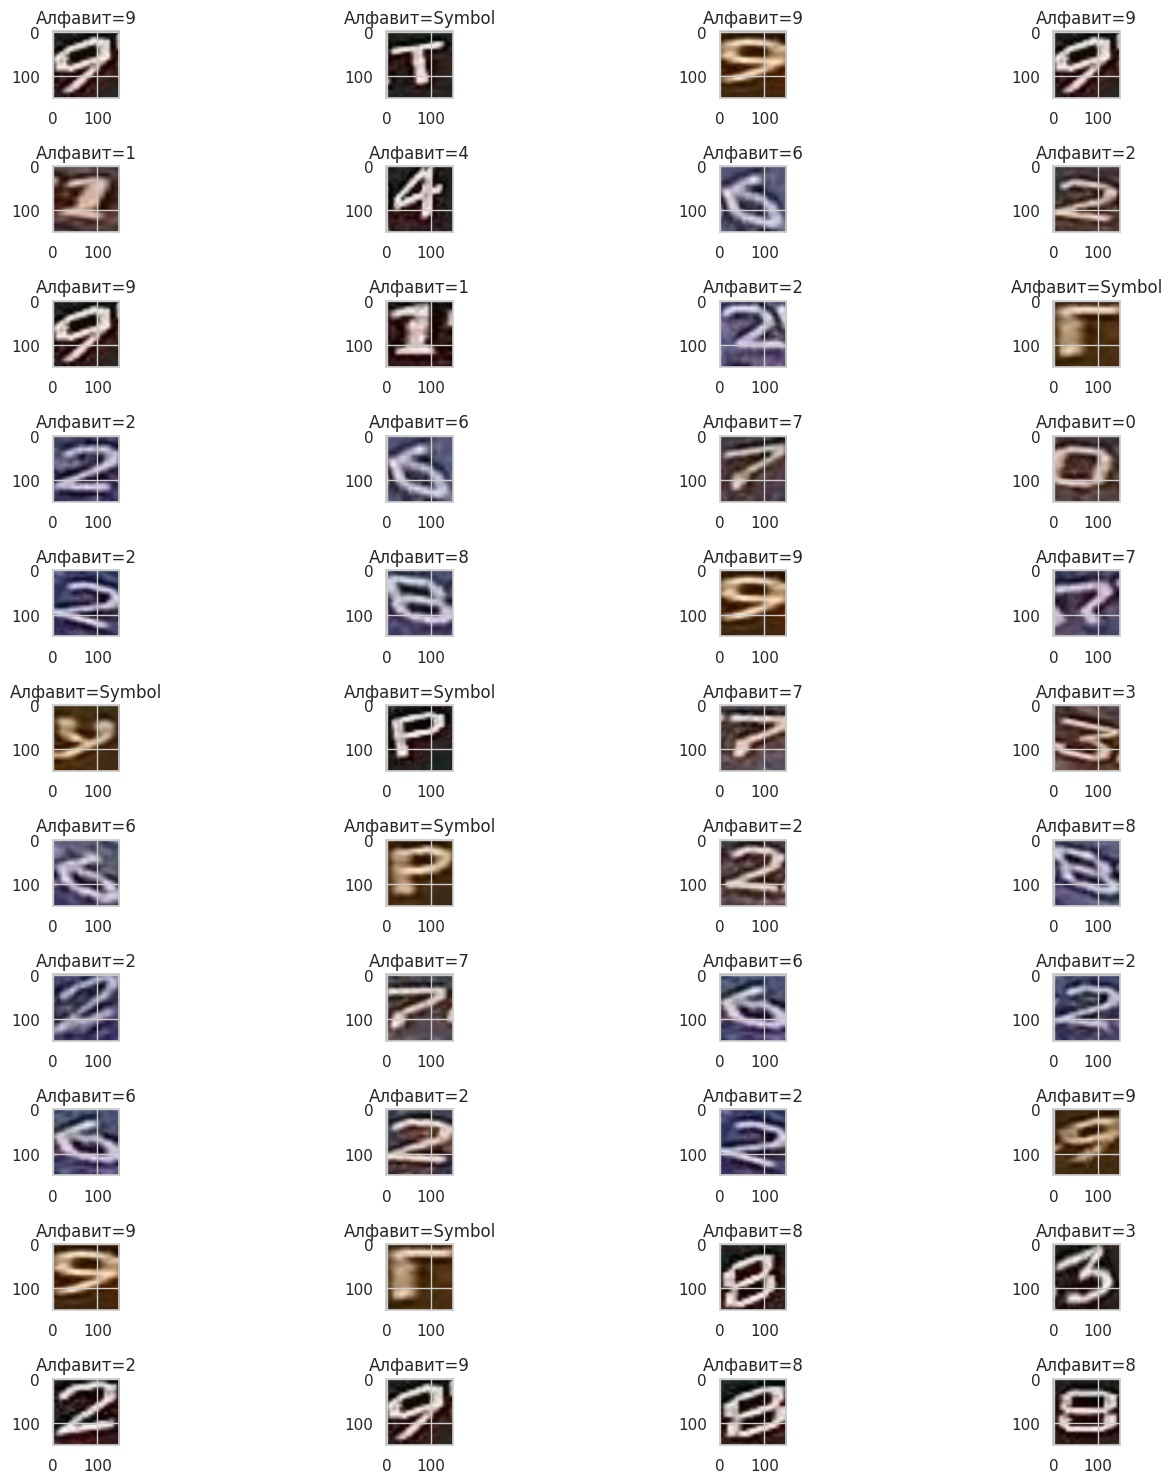

In [18]:
fig,ax=plt.subplots(11,4)
fig.set_size_inches(15,15)
for i in range(11):
    for j in range (4):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Алфавит='+Z[l])

plt.tight_layout()



In [19]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,11)
X=np.array(X)
X=X/255

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [61]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(11))
model.add(Activation('relu'))
model.add(Dense(11, activation = "softmax"))

In [62]:
batch_size=128
epochs=5

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [63]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [65]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 18, 18, 96)       

In [67]:
#History = model.fit_generator(x_train,y_train,validation_data = (x_test,y_test), verbose = 1)
History = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 11)

Epoch 1/11
87/87 [==============================] - 12s 54ms/step - loss: 1.4814 - accuracy: 0.4606 - val_loss: 0.6642 - val_accuracy: 0.7595
Epoch 2/11
87/87 [==============================] - 3s 32ms/step - loss: 0.3780 - accuracy: 0.8743 - val_loss: 0.2066 - val_accuracy: 0.9610
Epoch 3/11
87/87 [==============================] - 3s 34ms/step - loss: 0.1723 - accuracy: 0.9624 - val_loss: 0.1386 - val_accuracy: 0.9729
Epoch 4/11
87/87 [==============================] - 3s 31ms/step - loss: 0.0913 - accuracy: 0.9809 - val_loss: 0.0755 - val_accuracy: 0.9805
Epoch 5/11
87/87 [==============================] - 3s 30ms/step - loss: 0.0605 - accuracy: 0.9931 - val_loss: 0.0584 - val_accuracy: 0.9957
Epoch 6/11
87/87 [==============================] - 3s 31ms/step - loss: 0.0646 - accuracy: 0.9935 - val_loss: 0.0602 - val_accuracy: 0.9967
Epoch 7/11
87/87 [==============================] - 3s 30ms/step - loss: 0.0744 - accuracy: 0.9902 - val_loss: 0.2492 - val_accuracy: 0.8992
Epoch 8/11
8

In [68]:
History.history

{'loss': [1.48142409324646,
  0.37802764773368835,
  0.17225202918052673,
  0.09128999710083008,
  0.06048288941383362,
  0.06460881233215332,
  0.07444123923778534,
  0.0788770467042923,
  0.019851552322506905,
  0.006111187860369682,
  0.002606417052447796],
 'accuracy': [0.4606213867664337,
  0.8742774724960327,
  0.9624277353286743,
  0.9808526039123535,
  0.9931358098983765,
  0.9934971332550049,
  0.9902456402778625,
  0.9848265647888184,
  0.9974710941314697,
  0.9989162087440491,
  1.0],
 'val_loss': [0.6641739010810852,
  0.20660404860973358,
  0.13863618671894073,
  0.07551261782646179,
  0.05843941494822502,
  0.06018828600645065,
  0.24916478991508484,
  0.03770512342453003,
  0.01673092506825924,
  0.007378959562629461,
  0.006965757347643375],
 'val_accuracy': [0.7594799399375916,
  0.9609967470169067,
  0.9729143977165222,
  0.9804983735084534,
  0.9956663250923157,
  0.996749758720398,
  0.8992416262626648,
  0.9978331327438354,
  0.996749758720398,
  1.0,
  1.0]}

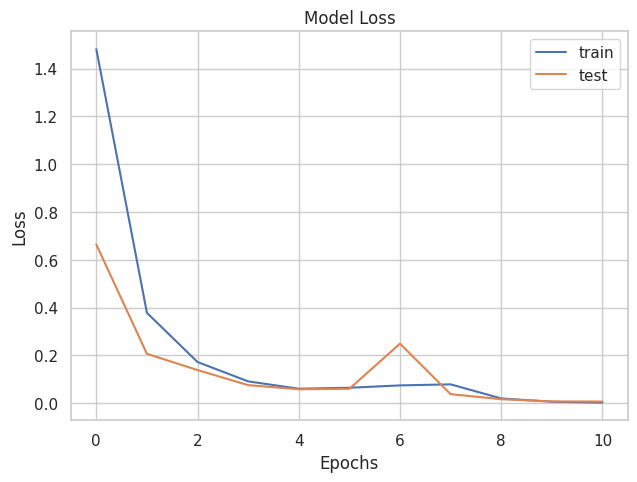

In [69]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

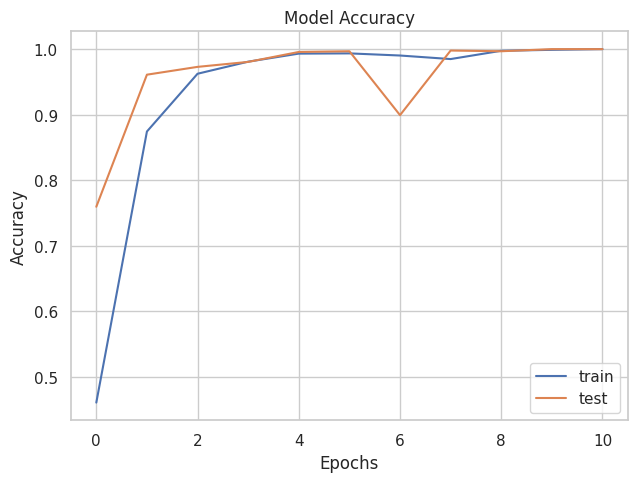

In [70]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [71]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

29/29 [==============================] - 0s 11ms/step


In [72]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [73]:
prop_class

[0, 1, 2, 3, 4, 5, 6, 7]

In [74]:
mis_class

[]

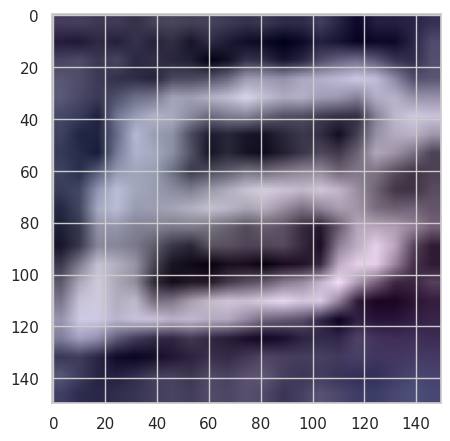

In [75]:
plt.imshow(x_test[1])

In [76]:
np.argmax(y_test[1],axis = 0)

10

In [77]:
pred_digits[1]

10

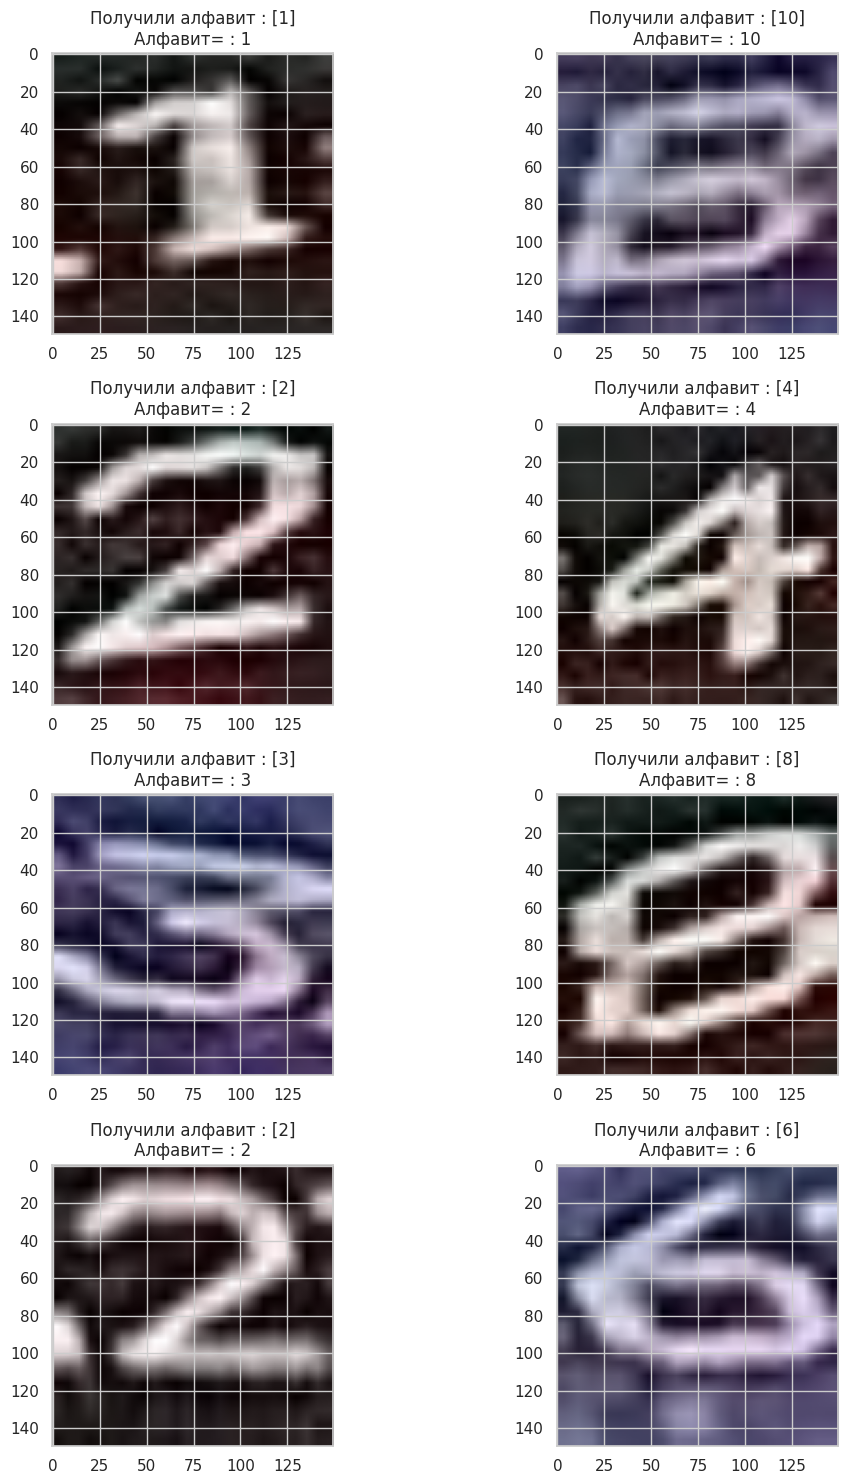

In [80]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Получили алфавит : "+str([pred_digits[prop_class[count]]])+"\n"+"Алфавит= : "+str(np.argmax(y_test[prop_class[count]])))
        plt.tight_layout()
        count+=1

IndexError: list index out of range

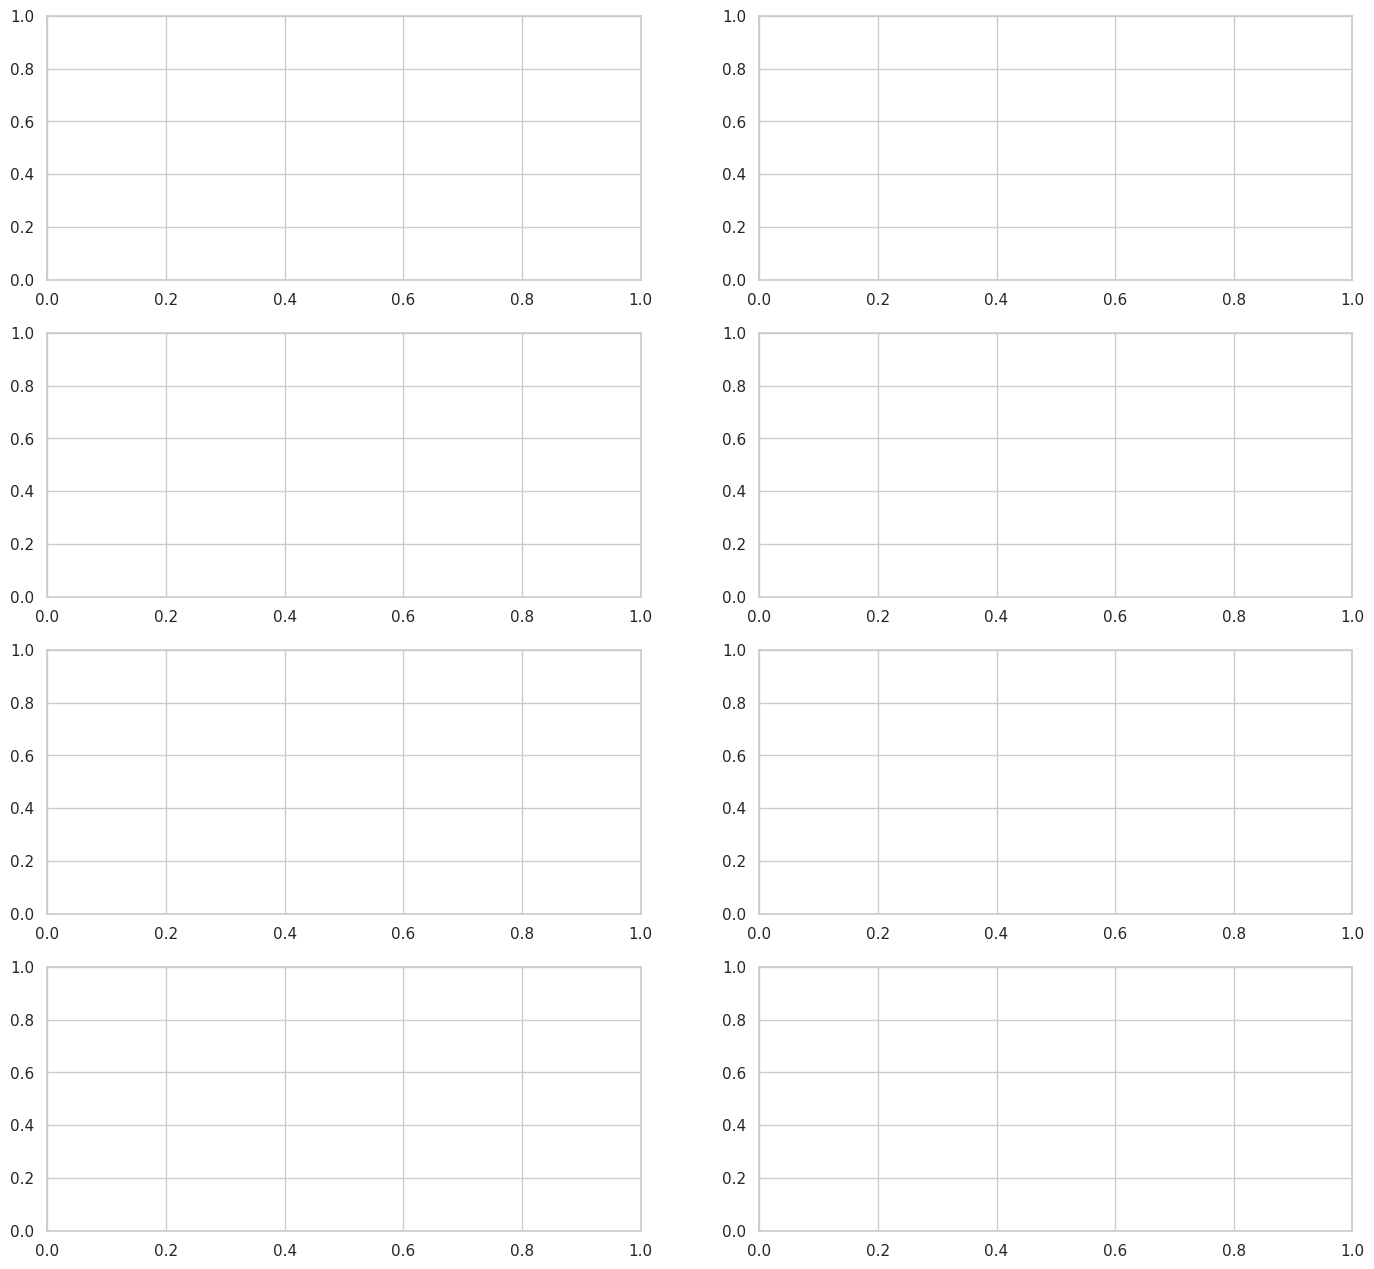

In [81]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])

        ax[i,j].set_title("Алфавит получили: "+str([pred_digits[mis_class[count]]])+"\n"+"Алфавит = : "+str(np.argmax(y_test[mis_class[count]])))
        plt.tight_layout()
        count+=1